In [1]:
%%time
from __future__ import absolute_import, division, print_function, unicode_literals
%load_ext autoreload
%load_ext tensorboard
%autoreload 2

import cv2
import pathlib 
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
sns.set(rc={"figure.figsize":(12,10)})
sns.set_style("whitegrid")
%matplotlib inline

import gc
gc.enable()
import os
import sys
import csv
import glob
import time
import json
import random
import datetime
import subprocess

try:
  %tensorflow_version 2.x
  print("TensorFlow 2.0 rc is available.")
except:
  print("TensorFlow 2.0 rc is not available.")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow version: ", tf.__version__)
print("Executing eagerly: ", tf.executing_eagerly())
print("GPU is","available." if tf.test.is_gpu_available() else "unavailable.")

def seed_everything(seed):
  try:
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
    print("Seeding intialized.")
  except:
    print("Seeding faled.")

seed_everything(999)

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

from IPython.display import display, clear_output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
print("Done.!")

TensorFlow 2.x selected.
TensorFlow 2.0 rc is available.
TensorFlow version:  2.0.0-rc0
Executing eagerly:  True
GPU is available.
Seeding intialized.
Done.!
CPU times: user 1.69 s, sys: 419 ms, total: 2.11 s
Wall time: 5.27 s


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train, X_test, y_train, y_test = X_train.reshape(-1,28,28,1)/255.0, X_test.reshape(-1,28,28,1)/255.0, tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

<Figure size 1440x1440 with 0 Axes>

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

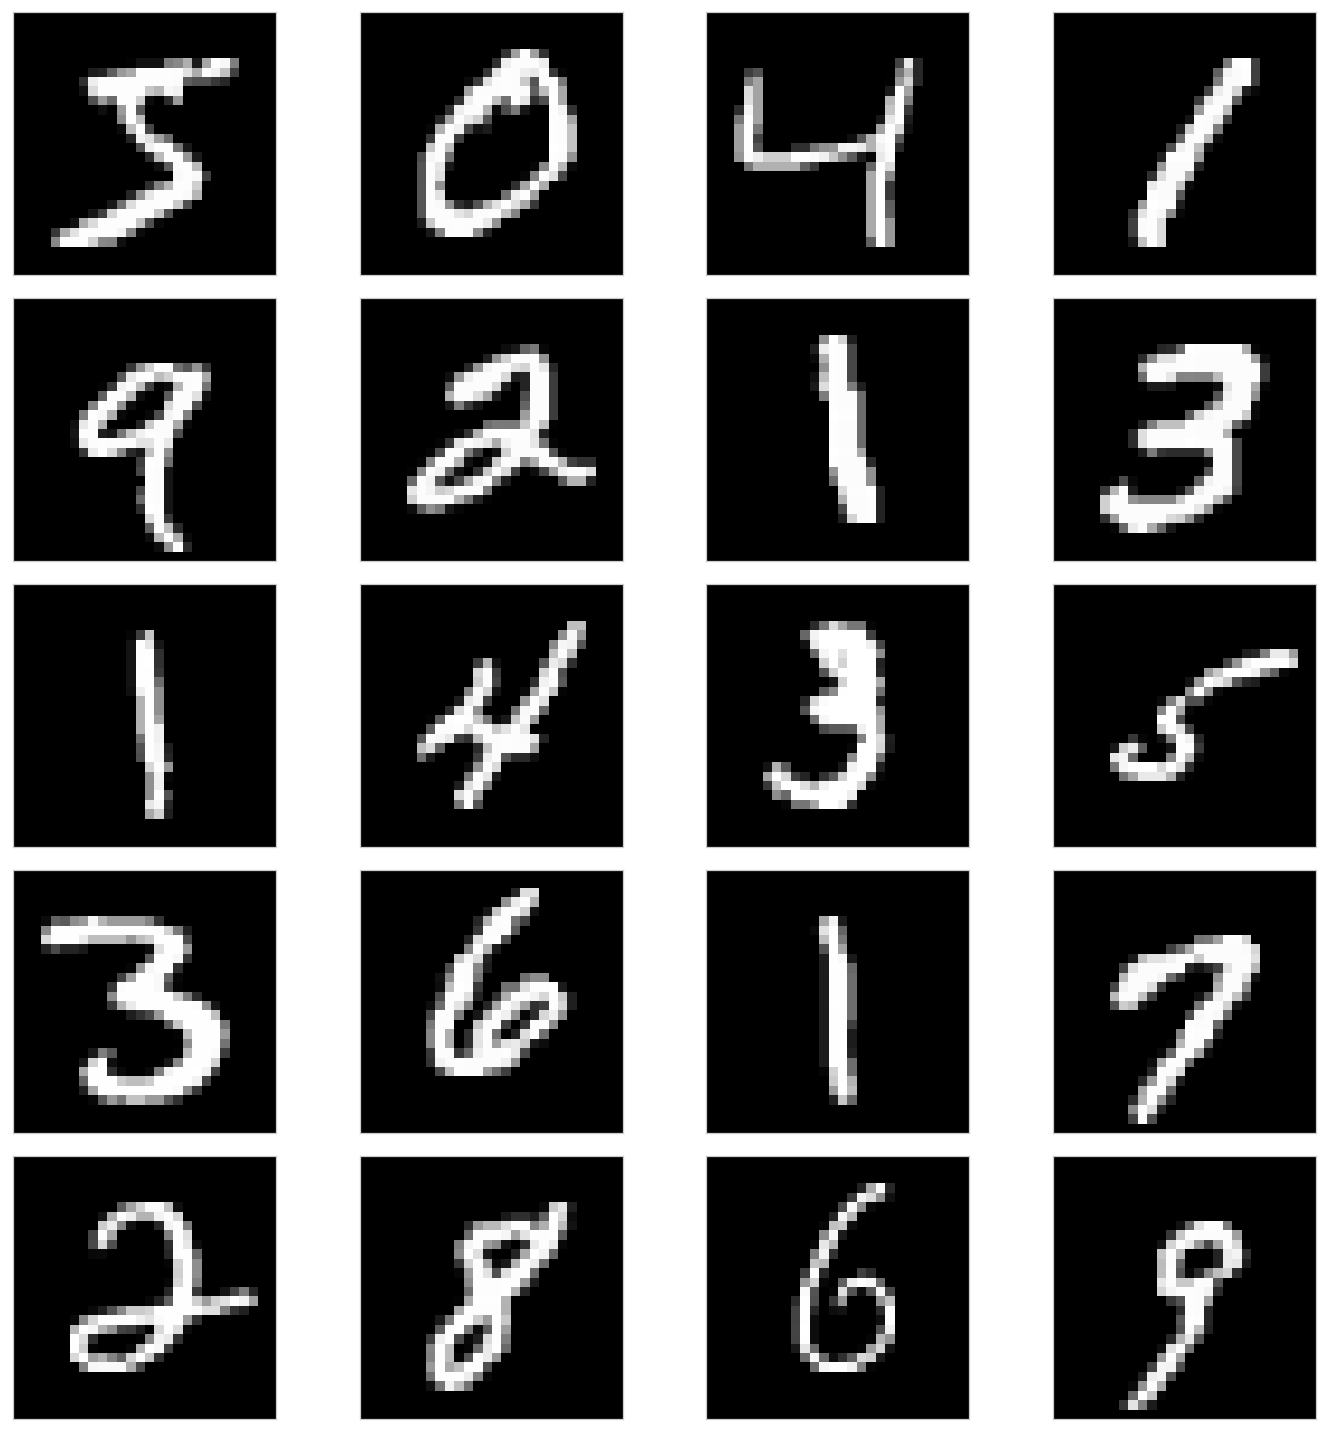

In [4]:
plt.figure(figsize=(20,20))
for idx in range(20):
  plt.subplot(5,4,idx+1)
  plt.imshow(np.squeeze(X_train[idx,:,:,:]),cmap="gray",interpolation="nearest")
  plt.grid(True)
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       102528    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 512)         1

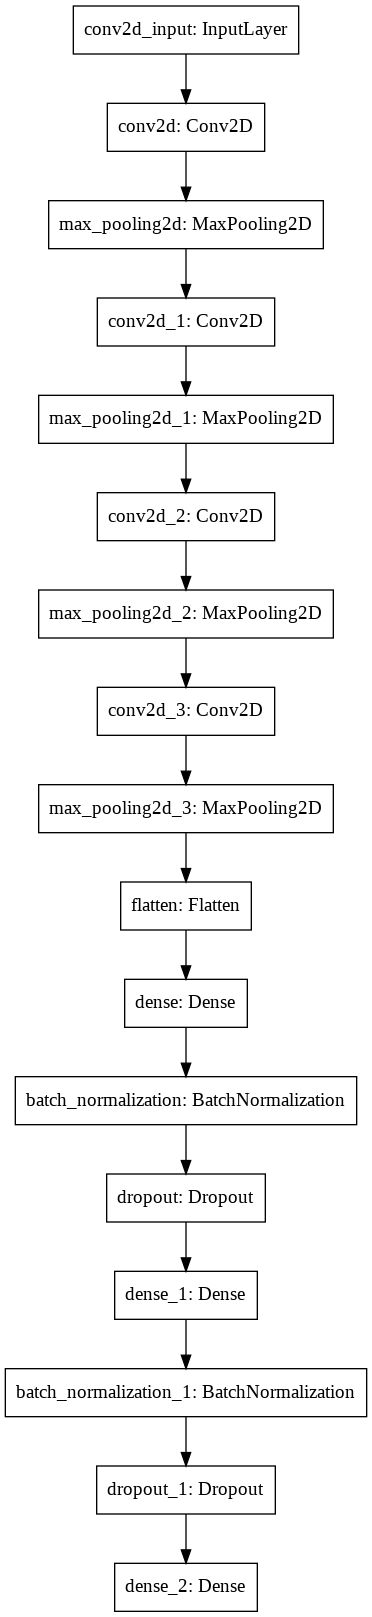

In [5]:
model = tf.keras.Sequential([
                            layers.Conv2D(32,kernel_size=(5,5),padding="same",activation=tf.nn.relu,use_bias=True,kernel_initializer="he_uniform",input_shape=(28,28,1)),
                            layers.MaxPool2D(pool_size=(2,2)),
                            layers.Conv2D(128,kernel_size=(5,5),padding="same",activation=tf.nn.relu,use_bias=True,kernel_initializer="he_uniform"),
                            layers.MaxPool2D(pool_size=(2,2)),
                            layers.Conv2D(256,kernel_size=(3,3),padding="same",activation=tf.nn.relu,use_bias=True,kernel_initializer="he_uniform"),
                            layers.MaxPool2D(pool_size=(2,2)),
                            layers.Conv2D(512,kernel_size=(3,3),padding="same",activation=tf.nn.relu,use_bias=True,kernel_initializer="he_uniform"),
                            layers.MaxPool2D(pool_size=(2,2)),
                            layers.Flatten(),
                            layers.Dense(1024, activation=tf.nn.relu),
                            layers.BatchNormalization(),
                            layers.Dropout(0.2),
                            layers.Dense(512, activation=tf.nn.relu),
                            layers.BatchNormalization(),
                            layers.Dropout(0.2),
                            layers.Dense(10,activation=tf.nn.softmax) 
])

model.compile(optimizer="adam",loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()
tf.keras.utils.plot_model(model)

In [0]:
class PlotLearning(tf.keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.i = 0
    self.x = []
    self.loss = []
    self.val_loss = []
    self.acc = []
    self.val_acc = []
    self.fig = plt.figure()
    self.logs = []

  def on_epoch_end(self, epoch, logs={}):
    self.logs.append(logs)
    self.x.append(self.i)
    self.loss.append(logs.get('loss'))
    self.acc.append(logs.get('accuracy'))
    self.val_loss.append(logs.get('val_loss'))        
    self.val_acc.append(logs.get('val_accuracy'))
    self.i += 1
    f, ax = plt.subplots(1, 2, figsize=(16,6), sharex=True)
    ax = ax.flatten()
    clear_output(wait=True)
    ax[0].plot(self.x, self.loss, label="loss", lw=2)
    ax[0].plot(self.x, self.val_loss, label="val loss")
    ax[0].legend()
    ax[0].grid(True)
    ax[1].plot(self.x, self.acc, label="Accuracy", lw=2)
    ax[1].plot(self.x, self.val_acc, label="Validation Accuracy")
    ax[1].legend()
    ax[1].grid(True)
    plt.show();

In [0]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.3,patience=5,mode="auto",verbose=1,min_lr=0.000001)
checkpoint = tf.keras.callbacks.ModelCheckpoint("custom_model.h5",monitor="val_loss",verbose=1,save_best_only=True,mode="auto")
early_stopping = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.5,patience=20,verbose=1,mode="auto")
plotLoss = PlotLearning()

In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,  
                               samplewise_center=False,  
                               featurewise_std_normalization=False,  
                               samplewise_std_normalization=False,  
                               zca_whitening=False,  
                               rotation_range=10,  
                               zoom_range = 0.1, 
                               width_shift_range=0.1,  
                               height_shift_range=0.1,  
                               horizontal_flip=False,  
                               vertical_flip=False)

datagen.fit(X_train)

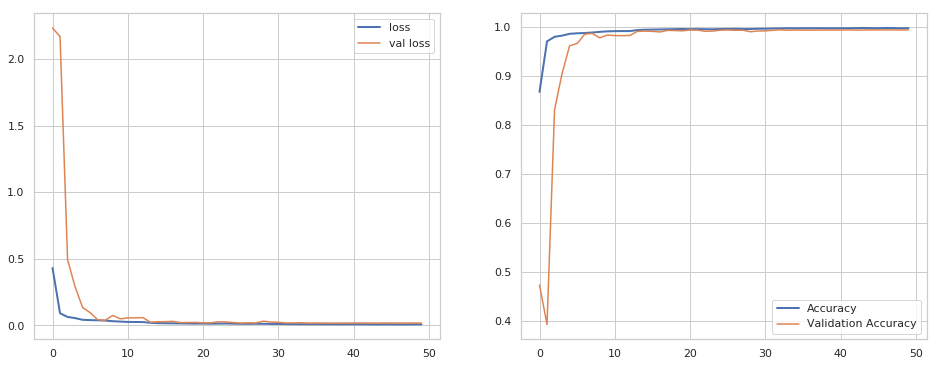

30/30 - 23s - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0182 - val_accuracy: 0.9938


In [9]:
history = model.fit_generator(datagen.flow(X_train, 
                    y_train, 
                    batch_size=2056), 
                    epochs=50, 
                    validation_data = (X_test, y_test), 
                    verbose=2, 
                    callbacks = [early_stopping, reduce_lr, checkpoint, plotLoss])

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [12]:
test_loss

0.01810264727964386

In [13]:
test_acc

0.9938